# Web Scraping Tables with Pandas

In this notebook, we will learn how to scrape tables from websites using the Pandas library. We will use the `read_html` function from Pandas to extract tables from a website and convert them into a DataFrame. We will also learn how to clean and preprocess the data to make it ready for analysis.

## Pandas

Pandas is a powerful data manipulation library in Python. It provides data structures and functions to efficiently manipulate large datasets. Pandas is built on top of NumPy and provides an easy-to-use data structure called DataFrame, which is similar to a table in a relational database.

Some call Pandas "Excel on steroids" because it provides similar functionalities as Excel but with more power and flexibility. Pandas is widely used in data analysis, data cleaning, and data preprocessing tasks.

### Pandas official website

https://pandas.pydata.org/

### Installing Pandas


# or PyPI
pip install pandas

There are many optional packages that can be installed to extend the functionality of Pandas. For example to install Excel support and HTML support, you can use the following command:
```
pip install "pandas[excel, html]"
```
From notebook we would use !pip install pandas



In [1]:
# now that we have installed Pandas let's import it
import pandas as pd # this is the standard way to import pandas
# let's print version
print(f"Pandas version: {pd.__version__}")
# expect to see different version if you are using Google Colab
# they use slightly older version

Pandas version: 2.2.2


In [2]:
# Turns out we can use Pandas for simple web scraping
# Web scraping is not Pandas main purpose, but it can be used for simple tasks
# As long as the web page has a table, we can use Pandas to extract it

# we need to install lxml library - we should already have it

# we just need an url first
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
print(f"Will scrape data from: {url}")
dataframes = pd.read_html(url) # this will make a connection to the page and extract ALL tables
# it will return a list of dataframes
print(f"Number of tables found: {len(dataframes)}")

Will scrape data from: https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
Number of tables found: 2


In [3]:
# let's see the first table
world_population = dataframes[0] # first table
# display first 10 rows
world_population.head(10) # head method will display first 5 rows by default, so we supply 10

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,7975105156,8045311448,+0.88%,NaN,NaN
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia
3,United States,338289857,339996564,+0.50%,Americas,Northern America
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia
5,Pakistan,235824862,240485658,+1.98%,Asia,Southern Asia
6,Nigeria,218541212,223804632,+2.41%,Africa,Western Africa
7,Brazil,215313498,216422446,+0.52%,Americas,South America
8,Bangladesh,171186373,172954319,+1.03%,Asia,Southern Asia
9,Russia,144713314,144444359,−0.19%,Europe,Eastern Europe


In [4]:
# now let's save this information to excel
world_population.to_excel("world_population.xlsx", index=False) # index=False will not save row numbers

In [5]:
# let's see what data types we have
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Location                     239 non-null    object
 1   Population (1 July 2022)     239 non-null    int64 
 2   Population (1 July 2023)     239 non-null    int64 
 3   Change                       238 non-null    object
 4   UN Continental Region[1]     238 non-null    object
 5   UN Statistical Subregion[1]  238 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.3+ KB


In [6]:
world_population.describe() # this will show some basic statistics for numerical columns

,Population (1 July 2022),Population (1 July 2023)
count,2.390000e+02,2.390000e+02
mean,6.673727e+07,6.732248e+07
std,5.312416e+08,5.357716e+08
min,5.500000e+01,4.500000e+01
25%,4.005130e+05,4.033320e+05
50%,5.489740e+06,5.474360e+06
75%,2.235942e+07,2.323925e+07
max,7.975105e+09,8.045311e+09


In [7]:
# column names
print(world_population.columns)

Index(['Location', 'Population (1 July 2022)', 'Population (1 July 2023)',
       'Change', 'UN Continental Region[1]', 'UN Statistical Subregion[1]'],
      dtype='object')


In [9]:
# let's make a new column of population change from 2022 to 2023
world_population["Population Change"] = world_population['Population (1 July 2023)'] - world_population["Population (1 July 2022)"]
# let's see the first 10 rows
world_population.head(10)

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1],Population Change
0,World,7975105156,8045311448,+0.88%,NaN,NaN,70206292
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia,11454490
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia,-215985
3,United States,338289857,339996564,+0.50%,Americas,Northern America,1706707
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia,2032784
5,Pakistan,235824862,240485658,+1.98%,Asia,Southern Asia,4660796
6,Nigeria,218541212,223804632,+2.41%,Africa,Western Africa,5263420
7,Brazil,215313498,216422446,+0.52%,Americas,South America,1108948
8,Bangladesh,171186373,172954319,+1.03%,Asia,Southern Asia,1767946
9,Russia,144713314,144444359,−0.19%,Europe,Eastern Europe,-268955


In [11]:
# let's filter out all countries that start with L
l_countries = world_population[world_population.Location.str.startswith("L")]
# note since column Location had a single word, we can use dot notation
# it is much more convenient than using bracket notation
# however it will not work when column is multi-word
# also it will not work if column is named the same as some method of DataFrame
l_countries.head(20)

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1],Population Change
103,Laos,7529475,7633779,+1.39%,Asia,South-eastern Asia,104304
107,Libya,6812341,6888388,+1.12%,Africa,Northern Africa,76047
120,Liberia,5302681,5418377,+2.18%,Africa,Western Africa,115696
122,Lebanon,5489740,5353930,−2.47%,Asia,Western Asia,-135810
142,Lithuania,2750055,2718352,−1.15%,Europe,Northern Europe,-31703
147,Lesotho,2305826,2330318,+1.06%,Africa,Southern Africa,24492
151,Latvia,1850651,1830212,−1.10%,Europe,Northern Europe,-20439
169,Luxembourg,647599,654768,+1.11%,Europe,Western Europe,7169
217,Liechtenstein,39327,39585,+0.66%,Europe,Western Europe,258


In [12]:
# order by population change
l_countries.sort_values(by="Population Change", ascending=False).head(20) # pandas typically in_place flag is False

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1],Population Change
120,Liberia,5302681,5418377,+2.18%,Africa,Western Africa,115696
103,Laos,7529475,7633779,+1.39%,Asia,South-eastern Asia,104304
107,Libya,6812341,6888388,+1.12%,Africa,Northern Africa,76047
147,Lesotho,2305826,2330318,+1.06%,Africa,Southern Africa,24492
169,Luxembourg,647599,654768,+1.11%,Europe,Western Europe,7169
217,Liechtenstein,39327,39585,+0.66%,Europe,Western Europe,258
151,Latvia,1850651,1830212,−1.10%,Europe,Northern Europe,-20439
142,Lithuania,2750055,2718352,−1.15%,Europe,Northern Europe,-31703
122,Lebanon,5489740,5353930,−2.47%,Asia,Western Asia,-135810


<Axes: xlabel='Location'>

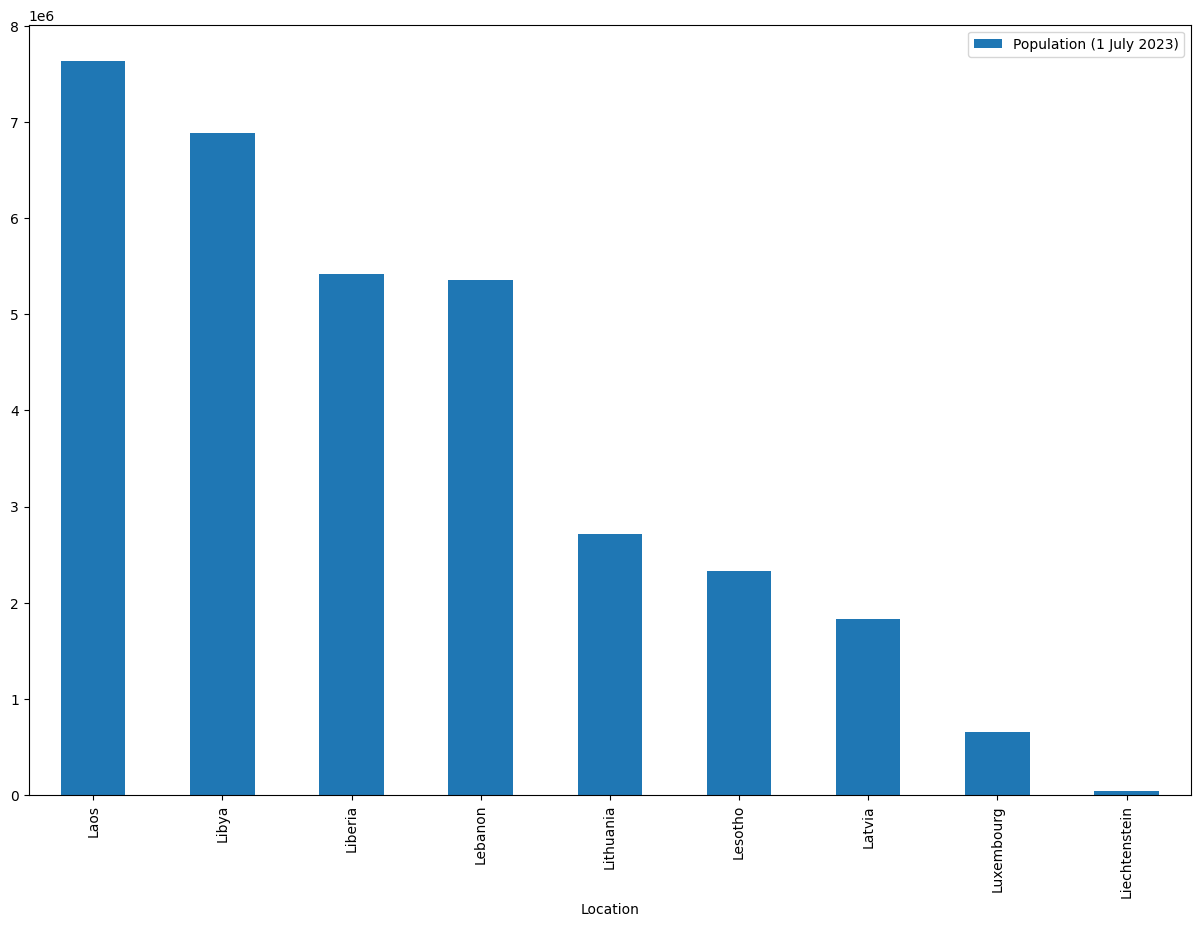

In [13]:
# plot l countries by population in 2023
l_countries.plot(x="Location", y="Population (1 July 2023)", kind="bar", figsize=(15, 10))

## Back to scraping apartments


In [14]:
# for apartments we have url
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
print(f"Will scrape data from: {url}")
dataframes = pd.read_html(url) # this will make a connection to the page and extract ALL tables
# it will return a list of dataframes
print(f"Number of tables found: {len(dataframes)}")

Will scrape data from: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Number of tables found: 6


In [15]:
# if the table that we want is 5th in the page what number should we use for indexing?
# 4, because indexing starts from 0
apartments = dataframes[4] # 5th table
# display first 10 rows
apartments.head(10) # head method will display first 5 rows by default, so we supply 10

,0,1,2,3,4,5,6,7,8,9
0,Sludinājumi \tdatums,Sludinājumi \tdatums,Sludinājumi \tdatums,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
1,NaN,NaN,"Omulīgs dzīvoklis ar labu mājas sajūtu, 2 ista...",Antonijas 15,2,35,2/5,P. kara,"2,143 €","75,000 €"
2,NaN,NaN,"Renovētā mājā pārdod gaišu, klusu 4 istabu dzī...",Čaka 31,4,74,3/4,P. kara,"1,959 €","145,000 €"
3,NaN,NaN,"Renovētā mājā pārdod gaišu, klusu 3 istabu Dzī...",Čaka 31,3,84,3/4,P. kara,"1,452 €","122,000 €"
4,NaN,NaN,Stilīgs 2 istabu dzīvoklis Rīgas centrā. Māja ...,Čaka 31,2,44,1/4,P. kara,"2,023 €","89,000 €"
5,NaN,NaN,Pārdod 3.istabu dzīvokli Valdemāra / Zirņu iel...,Valdemāra 145,3,62,1/6,Hrušč.,"1,323 €","82,000 €"
6,NaN,NaN,"Pārdošanā skaists, saulains un mūsdienīgs dzīv...",Skanstes 29,1,50,5/23,Jaun.,"2,300 €","115,000 €"
7,NaN,NaN,"Pārdod plašu, pilnībā iekārtotu vienistabas dz...",Brīvības 95,1,35,6/6,Renov.,"2,771 €","97,000 €"
8,NaN,NaN,Projekta attīstītājs pārdod dzīvokli renovētā ...,Augšiela 8,2,29,4/6,Renov.,"1,879 €","54,500 €"
9,NaN,NaN,Продаём 3-комнатную квартиру с хорошей планиро...,Duntes 20,3,71,1/2,P. kara,831 €,"59,000 €"


In [16]:
# let's save this information to excel
# let's use datetime as part of the file name
from datetime import datetime
now = datetime.now()
# we want only year_month_day_hour_minute
now_str = now.strftime("%Y_%m_%d_%H_%M")
apartments.to_excel(f"apartments_{now_str}.xlsx", index=False) # index=False will not save row numbers
# pandas can save to many other formats including csv, json, sql, stata, sas, etc.